# Análisis de Evasión de Clientes - Challenge Telecom X - Gustavo Vásquez Serey


Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

¿Qué se realizará?

✅ Importar y manipular datos desde una API de manera eficiente.

✅ Aplicar los conceptos de ETL (Extracción, Transformación y Carga) en la preparación de los datos.

✅ Crear visualizaciones estratégicas para identificar patrones y tendencias.

✅ Realizar un Análisis Exploratorio de Datos (EDA) y generar un informe con insights relevantes.

#📌 Extracción

In [2]:
# Librerías necesarias
import requests
import pandas as pd

# URL del archivo JSON en GitHub
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Solicitar los datos desde la URL
response = requests.get(url)
response.raise_for_status()  # Lanza un error si la descarga falla

# Convertir el contenido JSON a un DataFrame de pandas
data_json = response.json()
df = pd.DataFrame(data_json)

# Mostrar las primeras filas para verificar la carga
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [3]:
# Verificamos la forma (filas, columnas) del DataFrame para conocer su tamaño
print("Forma del DataFrame:", df.shape)

# Mostramos información general del DataFrame: cantidad de entradas, columnas, tipos de datos y valores nulos
print("\nInformación general:")
df.info()

# Mostramos estadísticas descriptivas para todas las columnas, incluyendo las categóricas
print("\nEstadísticas descriptivas:")
print(df.describe(include='all'))

# Mostramos las columnas del DataFrame
print("Columnas del DataFrame:")
print(df.columns.tolist())

# Mostramos los tipos de datos de cada columna del DataFrame
print("\nTipos de datos por columna:")
print(df.dtypes)


Forma del DataFrame: (7267, 6)

Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB

Estadísticas descriptivas:
        customerID Churn                                           customer  \
count         7267  7267                                               7267   
unique        7267     3                                                891   
top     0002-ORFBO    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
freq             1  5174                                                223   

                                                 phone 

* Diccionario de datos:

customerID: número de identificación único de cada cliente

Churn: si el cliente dejó o no la empresa

gender: género (masculino y femenino)

SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años

Partner: si el cliente tiene o no una pareja

Dependents: si el cliente tiene o no dependientes

tenure: meses de contrato del cliente

PhoneService: suscripción al servicio telefónico

MultipleLines: suscripción a más de una línea telefónica

InternetService: suscripción a un proveedor de internet

OnlineSecurity: suscripción adicional de seguridad en línea

OnlineBackup: suscripción adicional de respaldo en línea

DeviceProtection: suscripción adicional de protección del dispositivo

TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera

StreamingTV: suscripción de televisión por cable

StreamingMovies: suscripción de streaming de películas

Contract: tipo de contrato

PaperlessBilling: si el cliente prefiere recibir la factura en línea

PaymentMethod: forma de pago

Charges.Monthly: total de todos los servicios del cliente por mes

Charges.Total: total gastado por el cliente

In [4]:
# Identificaremos las columnas relevantes para el análisis de la evasión de clientes
columnas_relevantes = [
    "customerID", "Churn", "tenure", "Contract", "PaymentMethod", 
    "Charges.Monthly", "Charges.Total", "InternetService", "SeniorCitizen"
]
print("\nColumnas más relevantes para el análisis de evasión:")
print(columnas_relevantes)

# Verificar valores ausentes o nulos por columna
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Verificación de los duplicados solo en columnas que no contienen diccionarios
cols_no_dict = [col for col in df.columns if not isinstance(df[col].iloc[0], dict)]
print("\nCantidad de filas duplicadas (solo columnas sin diccionarios):", df[cols_no_dict].duplicated().sum())

# Verificación de los valores únicos en columnas categóricas que no son diccionarios
for col in cols_no_dict:
    if df[col].dtype == 'object':
        print(f"\nValores únicos en '{col}':")
        print(df[col].unique())

# Verificamos si hay columnas numéricas puras
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
print("\nColumnas numéricas puras:")
print(numerical_cols)

# No hay columnas numéricas puras en el DataFrame original, ya que los datos numéricos están anidados en los diccionarios.




Columnas más relevantes para el análisis de evasión:
['customerID', 'Churn', 'tenure', 'Contract', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total', 'InternetService', 'SeniorCitizen']

Valores nulos por columna:
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64

Cantidad de filas duplicadas (solo columnas sin diccionarios): 0

Valores únicos en 'customerID':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Valores únicos en 'Churn':
['No' 'Yes' '']

Columnas numéricas puras:
[]


In [5]:
print(df.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [6]:
# Convertir el campo 'Churn' en valores binarios: 1 para "Yes"/"Sí", 0 para "No"
df['Churn_bin'] = df['Churn'].replace({'Yes': 1, 'Sí': 1, 'No': 0, 'No': 0})

# Verificar la conversión
print(df[['Churn', 'Churn_bin']].head())

  Churn Churn_bin
0    No         0
1    No         0
2   Yes         1
3   Yes         1
4   Yes         1


In [7]:
# Normalizar columnas que contienen diccionarios en el DataFrame

from pandas import json_normalize

# Identificar columnas tipo dict
cols_dict = [col for col in df.columns if isinstance(df[col].iloc[0], dict)]

# Normalizar y expandir cada columna tipo dict
for col in cols_dict:
    # Normalizar la columna y agregar prefijo con el nombre original
    normalized = json_normalize(df[col]).add_prefix(f"{col}.")
    # Concatenar al DataFrame original
    df = pd.concat([df.drop(columns=[col]), normalized], axis=1)

# Verificar el resultado
print("Columnas después de normalizar:")
print(df.columns.tolist())
print(df.head())

Columnas después de normalizar:
['customerID', 'Churn', 'Churn_bin', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']
   customerID Churn Churn_bin customer.gender  customer.SeniorCitizen  \
0  0002-ORFBO    No         0          Female                       0   
1  0003-MKNFE    No         0            Male                       0   
2  0004-TLHLJ   Yes         1            Male                       0   
3  0011-IGKFF   Yes         1            Male                       1   
4  0013-EXCHZ   Yes         1          Female                       1   

  customer.Partner customer.De

In [8]:
# account.Charges.Monthly como numérica
df['account.Charges.Monthly'] = pd.to_numeric(df['account.Charges.Monthly'], errors='coerce')

# Crear la nueva columna
df['Cuentas_Diarias'] = df['account.Charges.Monthly'] / 30

# Verificar el resultado
print(df[['account.Charges.Monthly', 'Cuentas_Diarias']].head())

   account.Charges.Monthly  Cuentas_Diarias
0                     65.6         2.186667
1                     59.9         1.996667
2                     73.9         2.463333
3                     98.0         3.266667
4                     83.9         2.796667


#📊 Carga y análisis

In [10]:
# Análisis descriptivo de los datos principales

# Estadísticas descriptivas generales para columnas numéricas
print("Estadísticas descriptivas (numéricas):")
print(df.describe())

# Estadísticas descriptivas para todas las columnas, incluidas las categóricas
print("\nEstadísticas descriptivas (todas las columnas):")
print(df.describe(include='all'))

# Convertir 'account.Charges.Total' a numérico si es necesario
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# Mediana de las columnas numéricas relevantes
print("\nMediana de columnas numéricas relevantes:")
print(df[["account.Charges.Monthly", "account.Charges.Total", "Cuentas_Diarias"]].median())

# Desviación estándar de las columnas numéricas relevantes
print("\nDesviación estándar de columnas numéricas relevantes:")
print(df[["account.Charges.Monthly", "account.Charges.Total", "Cuentas_Diarias"]].std())

Estadísticas descriptivas (numéricas):
       customer.SeniorCitizen  customer.tenure  account.Charges.Monthly  \
count             7267.000000      7267.000000              7267.000000   
mean                 0.162653        32.346498                64.720098   
std                  0.369074        24.571773                30.129572   
min                  0.000000         0.000000                18.250000   
25%                  0.000000         9.000000                35.425000   
50%                  0.000000        29.000000                70.300000   
75%                  0.000000        55.000000                89.875000   
max                  1.000000        72.000000               118.750000   

       Cuentas_Diarias  
count      7267.000000  
mean          2.157337  
std           1.004319  
min           0.608333  
25%           1.180833  
50%           2.343333  
75%           2.995833  
max           3.958333  

Estadísticas descriptivas (todas las columnas):
        cus

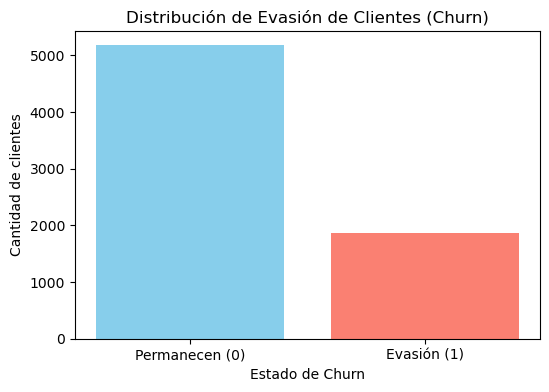

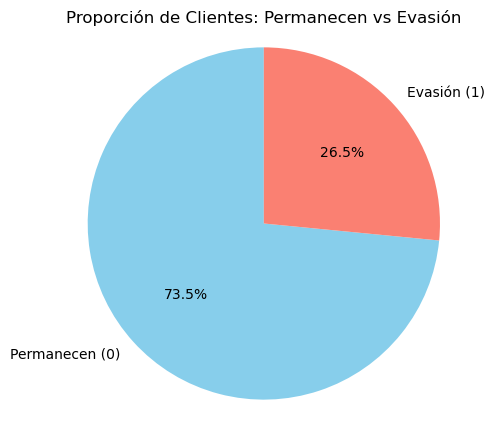

In [12]:
import matplotlib.pyplot as plt

# Asegurarse de que Churn_bin es numérico
df['Churn_bin'] = pd.to_numeric(df['Churn_bin'], errors='coerce')

# Gráfico de barras para la variable Churn
churn_counts = df['Churn_bin'].value_counts().sort_index()
labels = ['Permanecen (0)', 'Evasión (1)']

plt.figure(figsize=(6,4))
plt.bar(labels, churn_counts, color=['skyblue', 'salmon'])
plt.title('Distribución de Evasión de Clientes (Churn)')
plt.ylabel('Cantidad de clientes')
plt.xlabel('Estado de Churn')
plt.show()

# Gráfico de pastel para proporción
plt.figure(figsize=(5,5))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
plt.title('Proporción de Clientes: Permanecen vs Evasión')
plt.axis('equal')
plt.show()

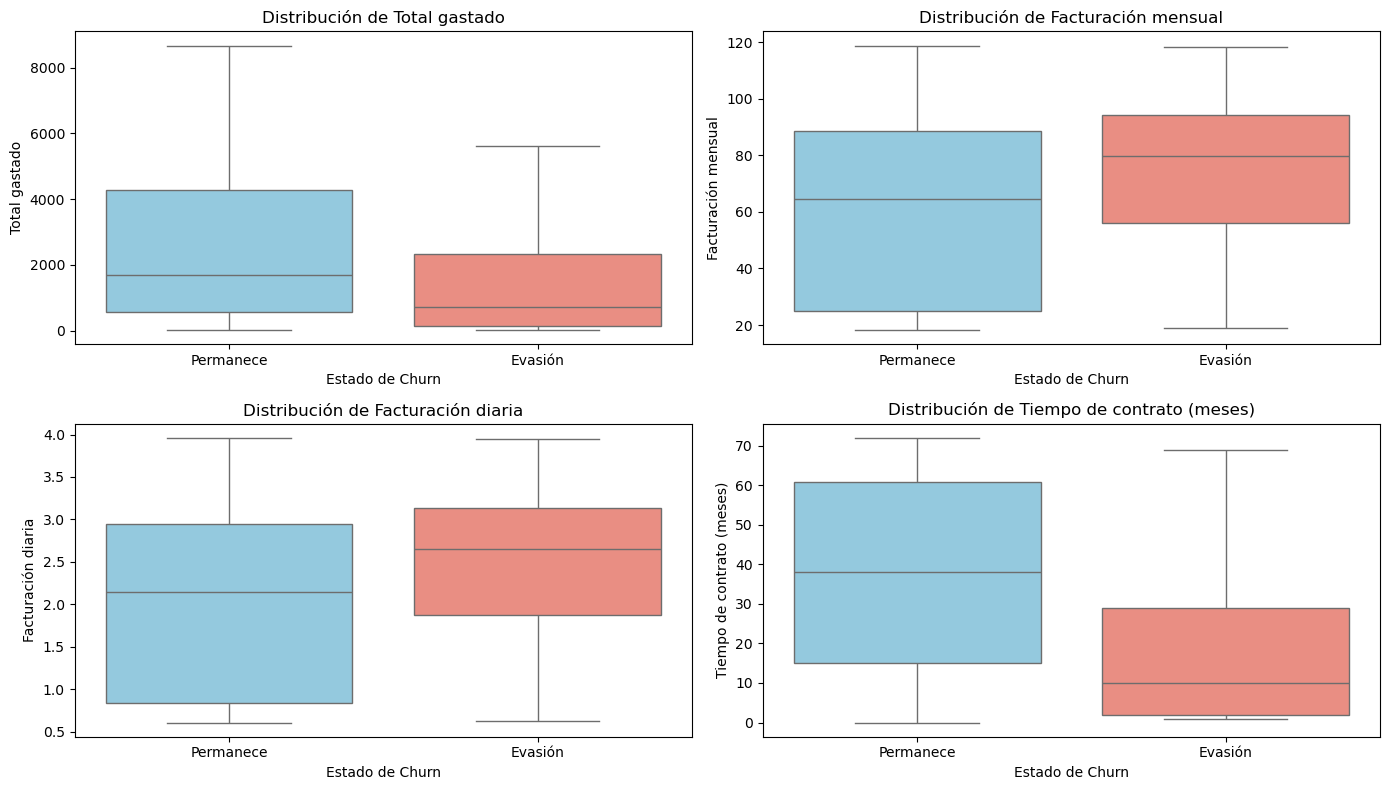

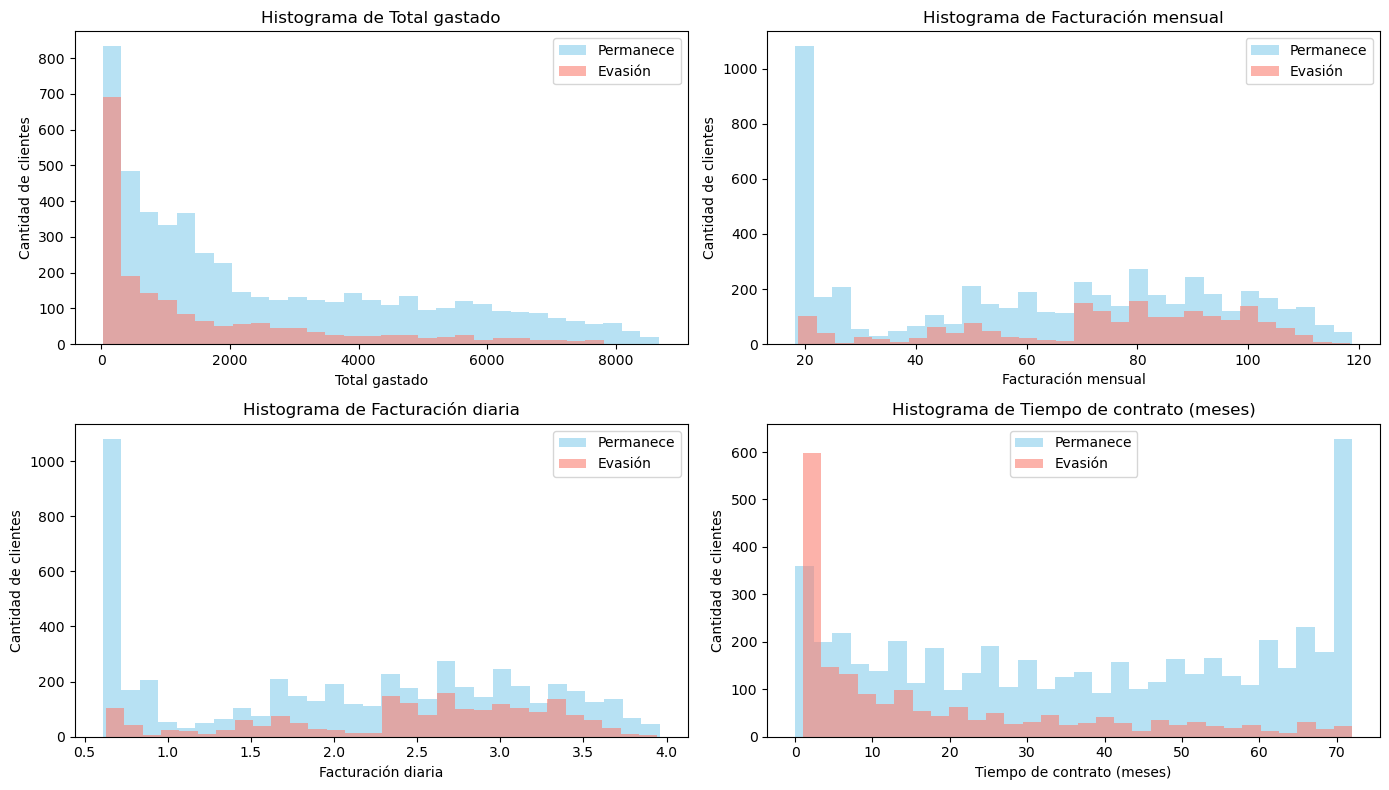

In [26]:
import warnings
warnings.filterwarnings('ignore')

# Traducción de nombres de variables numéricas para los títulos y ejes
traduccion_numericas = {
    'account.Charges.Total': 'Total gastado',
    'account.Charges.Monthly': 'Facturación mensual',
    'Cuentas_Diarias': 'Facturación diaria',
    'customer.tenure': 'Tiempo de contrato (meses)'
}

# Lista de variables numéricas
numericas = [
    'account.Charges.Total',
    'account.Charges.Monthly',
    'Cuentas_Diarias',
    'customer.tenure'
]

# Boxplots en cuadrantes
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
for ax, col in zip(axes.flatten(), numericas):
    sns.boxplot(
        data=df,
        x='Churn_bin',
        y=col,
        palette=['skyblue', 'salmon'],
        showfliers=False,
        ax=ax
    )
    ax.set_xticklabels(['Permanece', 'Evasión'])
    ax.set_title(f'Distribución de {traduccion_numericas.get(col, col)}')
    ax.set_xlabel('Estado de Churn')
    ax.set_ylabel(traduccion_numericas.get(col, col))
plt.tight_layout()
plt.show()

# Histogramas en cuadrantes
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
for ax, col in zip(axes.flatten(), numericas):
    for churn_value, color, label in zip([0, 1], ['skyblue', 'salmon'], ['Permanece', 'Evasión']):
        subset = df[df['Churn_bin'] == churn_value]
        ax.hist(subset[col].dropna(), bins=30, alpha=0.6, color=color, label=label)
    ax.set_title(f'Histograma de {traduccion_numericas.get(col, col)}')
    ax.set_xlabel(traduccion_numericas.get(col, col))
    ax.set_ylabel('Cantidad de clientes')
    ax.legend()
plt.tight_layout()
plt.show()


Al mirar los boxplots y los histogramas, se nota que los clientes que llevan más tiempo y han gastado más dinero tienden a quedarse en la empresa, mientras que quienes se van suelen tener menos antigüedad y un gasto total más bajo. Además, los que pagan más cada mes parecen estar un poco más propensos a irse, lo que podría indicar que el precio mensual influye en la decisión de cancelar. Lo mismo pasa si miramos el gasto diario: quienes pagan más por día también muestran más evasión. En resumen, los clientes nuevos y los que tienen una facturación mensual más alta son los que más se van, así que sería buena idea enfocar las estrategias de retención en ellos.

#📄Informe final

## 🔹 Introducción

En este análisis buscamos entender por qué los clientes de Telecom X están dejando la empresa. El objetivo es descubrir qué factores influyen en que un cliente se quede o se vaya, usando datos y gráficos para sacar conclusiones útiles y así ayudar a crear mejores estrategias para retener clientes.

## 🔹 Limpieza y Tratamiento de Datos

Primero, trajimos los datos desde una API y los organizamos para que fueran fáciles de analizar. Convertimos columnas que venían como diccionarios en columnas normales, cambiamos los datos importantes a números y creamos nuevas métricas, como el gasto diario. También revisamos si había datos faltantes o repetidos y transformamos la variable “Churn” (evasión) para que fuera más fácil de trabajar.

## 🔹 Análisis Exploratorio de Datos

Analizamos tanto datos de tipo texto como números:

**Variables categóricas:** Vimos cómo la evasión varía según el género, el tipo de contrato, el método de pago, el tipo de internet y si el cliente es adulto mayor, usando gráficos para ver las diferencias.

**Variables numéricas:** Revisamos el total gastado, el pago mensual, el pago diario y el tiempo que llevan como clientes, usando boxplots e histogramas para comparar los que se quedan y los que se van.

Los gráficos nos ayudaron a ver patrones claros en el comportamiento de los clientes.

## 🔹 Conclusiones e Insights

- Los clientes que llevan más tiempo y han gastado más dinero suelen quedarse, mientras que los nuevos y los que han gastado poco se van más.

- Los que pagan más cada mes o por día tienden a irse más, lo que muestra que el precio puede ser un motivo importante para cancelar.

- Los contratos mes a mes y los pagos electrónicos tienen más evasión.

- La mayoría de las bajas ocurren en los primeros meses como clientes.

## 🔹 Recomendaciones

**Enfocar esfuerzos en los clientes nuevos**, sobre todo en los primeros meses.

**Ofrecer descuentos o beneficios a quienes pagan más cada mes** para que no se vayan por el precio.

**Promover contratos más largos** y pagos automáticos, ya que estos clientes suelen quedarse más tiempo.

**Hacer campañas especiales** para los grupos con más riesgo de irse, como los que usan fibra óptica o pagan electrónicamente.

**Seguir revisando los datos de evasión** para ajustar las estrategias según cambie el comportamiento de los clientes.

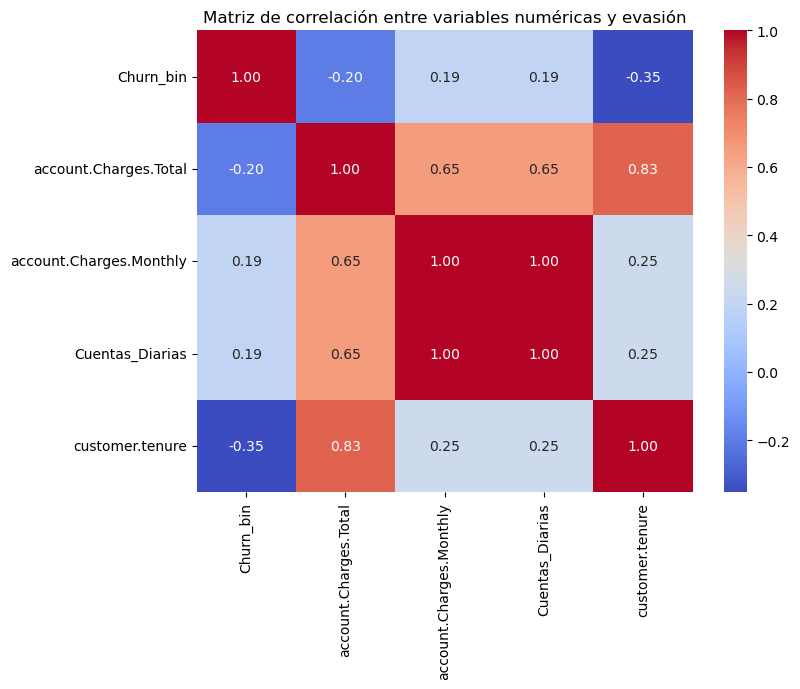

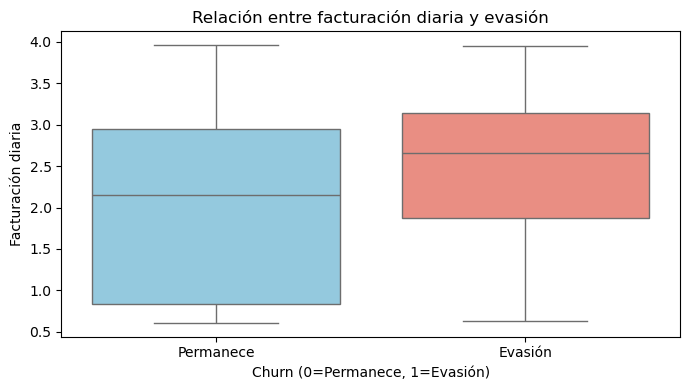

In [27]:
# Calcular la matriz de correlación para variables numéricas relevantes
variables_correlacion = [
    'Churn_bin',
    'account.Charges.Total',
    'account.Charges.Monthly',
    'Cuentas_Diarias',
    'customer.tenure'
]

corr = df[variables_correlacion].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación entre variables numéricas y evasión')
plt.show()

# Facturación diaria vs Evasión
plt.figure(figsize=(7,4))
sns.boxplot(x='Churn_bin', y='Cuentas_Diarias', data=df, palette=['skyblue', 'salmon'])
plt.title('Relación entre facturación diaria y evasión')
plt.xlabel('Churn (0=Permanece, 1=Evasión)')
plt.ylabel('Facturación diaria')
plt.xticks([0,1], ['Permanece', 'Evasión'])
plt.tight_layout()
plt.show()

Los clientes que pagan más por día son los que más se van, lo que sugiere que la empresa debería prestar atención a este grupo y considerar estrategias como descuentos o beneficios para retenerlos. Además, la facturación diaria es una variable relevante para predecir la evasión y debería ser considerada en futuros modelos predictivos.